The scripts should be run in order.
<br> Currently you are on 
<br>&emsp;&emsp;resume.ipynb
<br>&emsp;&emsp;job_selection.ipynb
<br>&ensp;->&nbsp;job_vectorise.ipynb

In [3]:
from glob import glob
from bs4 import BeautifulSoup
import logging, importlib, sys, string
import spacy
import pickle
import pandas as pd
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import show_word_cloud
from _utility import gl

set_logging(logging)
df_jobs = load_pickle_object(gl.pkl_df_selected_jobs)
number_of_jobs = len(df_jobs)
logging.info(f"Number of job descriptions read is {number_of_jobs}")
nlp = English()

2022-12-27 14:48:57,038 | INFO : Loading pickle file from: pickle\pkl_df_selected_jobs.pkl
2022-12-27 14:48:58,190 | INFO : Number of job descriptions read is 1204


In [4]:
def tokenise_words(text, nlp):
    word_tokens = nlp(text)
    # converts the words in word_tokens to lower case and then checks whether
    # they are present in stop_words or not
    tokens = [w for w in word_tokens if not w.is_stop and not w.is_punct and not w.is_space]
    return tokens

In [5]:
# Generate list of tokens for word clouds
list_body_tokens = []
list_bullet_point_tokens = []
list_title_tokens = []

# create 3 new columns for word tokens
df_jobs[gl.title_tokens] = ""
df_jobs[gl.body_tokens] = ""
df_jobs[gl.bullet_point_tokens] = ""

# Get word tokens for title, body, bullet points through the jobs dataframe
for i, row in df_jobs.iterrows():
    id = row[gl.id]
    body = row[gl.body]
    body_tokens = tokenise_words(body, nlp)
    df_jobs.at[id, gl.body_tokens] = body_tokens
    bullet_points = row[gl.bullet_points]
    bullet_point_tokens = tokenise_words(bullet_points, nlp)
    df_jobs.at[id, gl.bullet_point_tokens] = bullet_point_tokens
    titles = str(row[gl.title])
    title_tokens = tokenise_words(titles, nlp)
    df_jobs.at[id, gl.title_tokens] = title_tokens
    list_body_tokens.extend(body_tokens)
    list_bullet_point_tokens.extend(bullet_point_tokens)
    list_title_tokens.extend(title_tokens)


Show wordclouds

In [6]:
def tokens_to_text(list_tokens):
    text = ""
    for token in list_tokens:
        text += token.text + " "
    return text

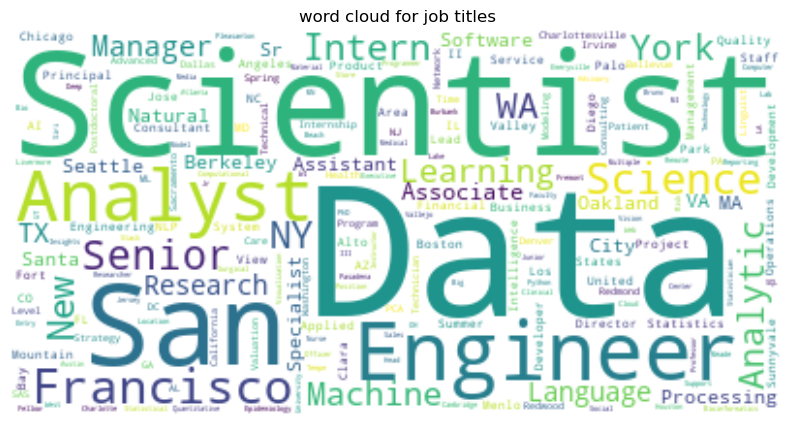

In [7]:
text = tokens_to_text(list_title_tokens)
title = "word cloud for job titles"
show_word_cloud(text, title)

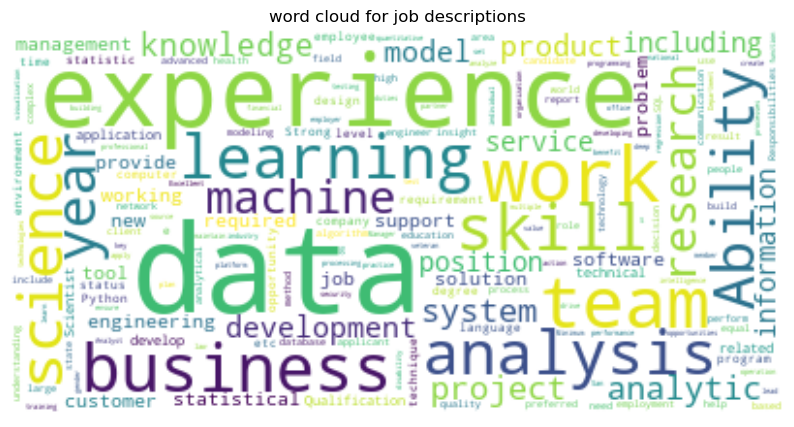

In [8]:
text = tokens_to_text(list_body_tokens)
title = "word cloud for job descriptions"
show_word_cloud(text, title)

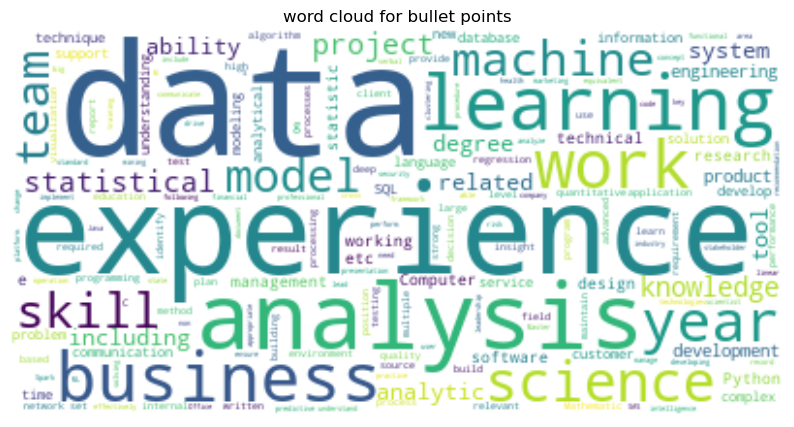

In [9]:
text = tokens_to_text(list_bullet_point_tokens)
title = "word cloud for bullet points"
show_word_cloud(text, title)

Check the important words using TD/IDF

In [22]:
def find_important_words(df, tag, tfIdfVectorizer):
    tfIdf = tfIdfVectorizer.fit_transform(df[tag])
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=[tag])
    df = df.sort_values(tag, ascending=False)
    return df

In [30]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, stop_words="english")
list_tag = [gl.body, gl.bullet_points]
df_body = pd.DataFrame()
df_bullet_points = pd.DataFrame()
list_df = []
for tag in list_tag:
    list_df.append(find_important_words(df_jobs, tag, tfIdfVectorizer))

In [32]:
df_body = list_df[0]
print(f"Most important words in job description\n{df_body.head(20)}")


Most important words in job description
                   Body
data           0.338618
using          0.218397
geographic     0.185487
gis            0.179992
understood     0.166110
analyze        0.164924
easily         0.157927
statistical    0.148325
scientist      0.142785
reporting      0.135459
sets           0.132655
intelligence   0.130927
answer         0.130157
candidate      0.127987
produce        0.126193
variety        0.125540
centauri       0.124676
beavercreek    0.124676
aesthetically  0.124676
spatially      0.124676


In [33]:
df_bullet_points = list_df[1]
print(f"Most important words in bullet points\n{df_bullet_points.head(20)}")

Most important words in bullet points
                     Bullet_Points
data                      0.230198
analyze                   0.200393
statistical               0.175830
matplotlibknowledge       0.172347
toolsvisualize            0.162905
productionmine            0.162905
questionsassess           0.162905
aesthetically             0.162905
dataspatially             0.162905
reportsexperience         0.156206
appealing                 0.156206
finished                  0.156206
intelligence              0.148867
produced                  0.146764
setsuse                   0.143174
techniquesdevelop         0.140065
sources                   0.138614
understood                0.130623
drawbacksknowledge        0.130623
slq                       0.130623
